In [40]:
# Date - 11/11/2025

%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
import yfinance as yf

In [42]:
ticker = 'AAPL'
start_date = '2024-01-01'
end_date = '2025-11-11'

#  fetch data



data = yf.download(tickers = ticker ,start=start_date,end=end_date)

# Reset index 
data.reset_index(inplace = True)

# display data
print(data.head())

C:\Users\Admin\AppData\Local\Temp\ipykernel_3264\1775440241.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers = ticker ,start=start_date,end=end_date)
[*********************100%***********************]  1 of 1 completed

Price        Date       Close        High         Low        Open    Volume
Ticker                   AAPL        AAPL        AAPL        AAPL      AAPL
0      2024-01-02  183.903244  186.677052  182.169616  185.399112  82488700
1      2024-01-03  182.526230  184.140985  181.713894  182.496512  58414500
2      2024-01-04  180.208115  181.377068  179.187752  180.445860  71983600
3      2024-01-05  179.484970  181.050190  178.484425  180.287405  62379700
4      2024-01-08  183.823990  183.863624  179.801976  180.386452  59144500


In [43]:
# check info

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        467 non-null    datetime64[ns]
 1   (Close, AAPL)   467 non-null    float64       
 2   (High, AAPL)    467 non-null    float64       
 3   (Low, AAPL)     467 non-null    float64       
 4   (Open, AAPL)    467 non-null    float64       
 5   (Volume, AAPL)  467 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 22.0 KB
None


In [44]:
# check values
print(data.describe())

Price                            Date       Close        High         Low  \
Ticker                                       AAPL        AAPL        AAPL   
count                             467  467.000000  467.000000  467.000000   
mean    2024-12-06 01:14:00.256959488  214.546200  216.616239  212.253548   
min               2024-01-02 00:00:00  163.664886  165.053552  162.752333   
25%               2024-06-19 00:00:00  195.044357  197.628912  192.556626   
50%               2024-12-04 00:00:00  217.526169  220.240502  215.497199   
75%               2025-05-25 00:00:00  231.723938  233.086290  228.695667   
max               2025-11-10 00:00:00  271.137146  277.051436  268.899335   
std                               NaN   25.622104   25.697899   25.367668   

Price         Open        Volume  
Ticker        AAPL          AAPL  
count   467.000000  4.670000e+02  
mean    214.319929  5.656669e+07  
min     164.012054  2.323470e+07  
25%     193.836759  4.205520e+07  
50%     217.694831 

In [45]:
# check null value
print(data.isnull().sum())

Price   Ticker
Date              0
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


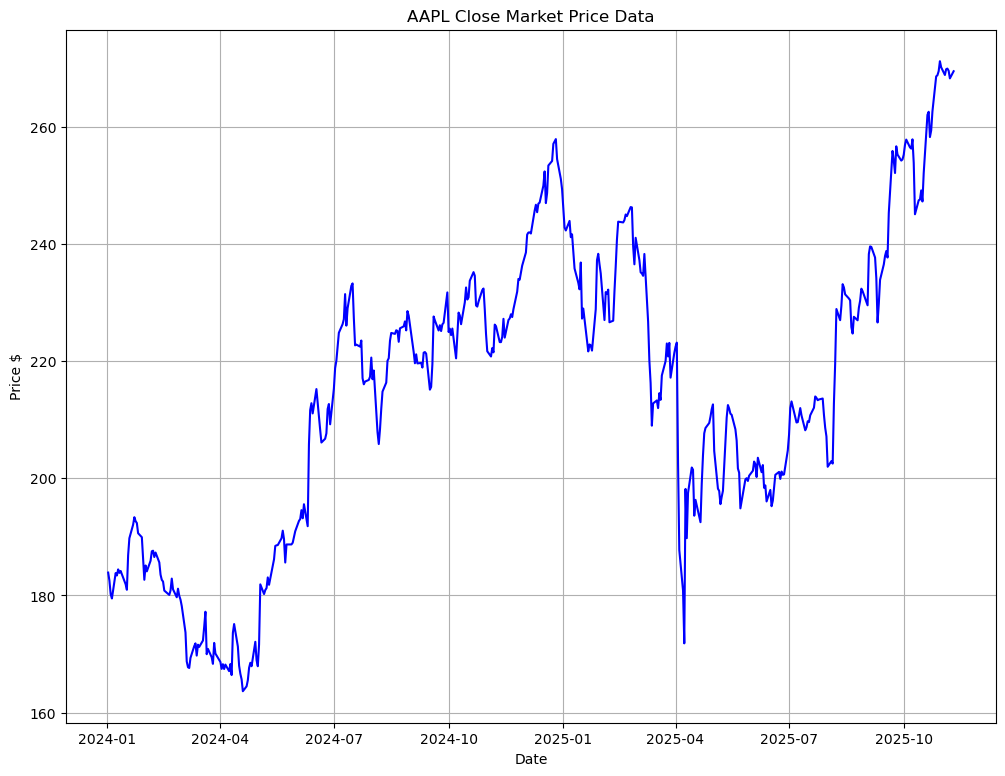

In [46]:
pt.figure(figsize = (12,9))
pt.plot(data['Date'],data['Close'], label = 'Close Price', color = 'blue')
pt.title('AAPL Close Market Price Data')
pt.xlabel('Date')
pt.ylabel('Price $')
pt.grid(True)
pt.show()

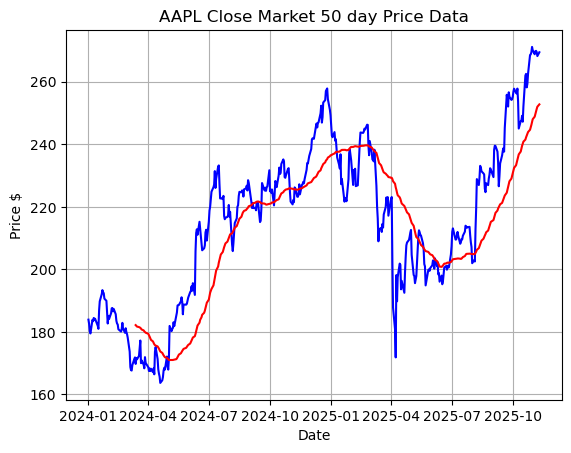

In [47]:
# moving Average for 50 days

data['MA50'] = data['Close'].rolling(window = 50).mean()

pt.plot(data['Date'],data['Close'],label='Close Price', color ='blue')
pt.plot(data['Date'],data['MA50'], label = '50 day MA', color = 'red')

pt.title('AAPL Close Market 50 day Price Data')
pt.xlabel('Date')
pt.ylabel('Price $')
pt.grid(True)
pt.show()


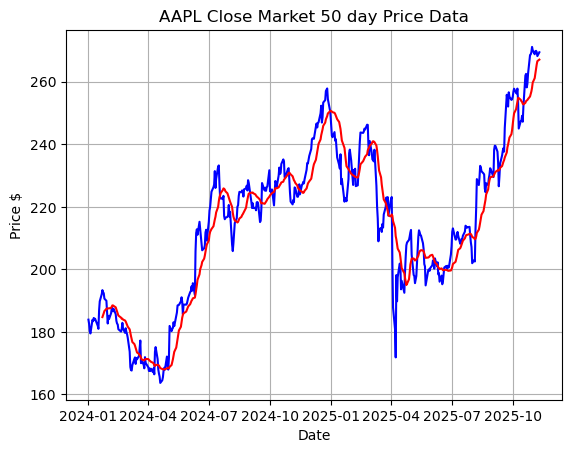

In [48]:
# moving Average for 15 days

data['MA15'] = data['Close'].rolling(window = 15).mean()

pt.plot(data['Date'],data['Close'],label='Close Price', color ='blue')
pt.plot(data['Date'],data['MA15'], label = '5 day MA', color = 'red')

pt.title('AAPL Close Market 50 day Price Data')
pt.xlabel('Date')
pt.ylabel('Price $')
pt.grid(True)
pt.show()

In [49]:
# Calculate RSI Using Pandas

# Calculate 14-day RSI
def calculate_rsi(data, period=14):
    # Calculate daily price changes
    delta = data['Close'].diff()
    # Separate gains and losses
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    # Calculate RS (Relative Strength)
    rs = gain / loss
    
    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))
    
    return rsi


# Apply RSI
data['RSI_14'] = calculate_rsi(data, period=14)

# Display last few rows to verify
print(data[['Date', 'Close', 'RSI_14']].tail(10))

Price        Date       Close     RSI_14
Ticker                   AAPL           
457    2025-10-28  268.739471  61.176941
458    2025-10-29  269.438812  67.163566
459    2025-10-30  271.137146  83.891081
460    2025-10-31  270.108154  80.532453
461    2025-11-03  268.789429  77.708370
462    2025-11-04  269.778473  77.366510
463    2025-11-05  269.878387  81.487699
464    2025-11-06  269.508728  77.693301
465    2025-11-07  268.209991  63.596702
466    2025-11-10  269.429993  64.662820


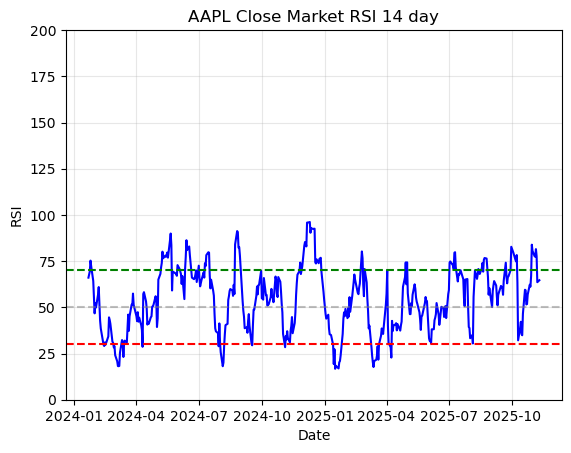

In [66]:

pt.plot(data['Date'],data['RSI_14'], label = '14 day MA', color = 'blue')
pt.axhline(y=70, color='green', linestyle='--', label='Overbought(70)')
pt.axhline(y=30, color='red', linestyle='--', label='Overbought(30)')
pt.axhline(y=50, color='gray', linestyle='--', alpha=0.5)


pt.title('AAPL Close Market RSI 14 day')
pt.xlabel('Date')
pt.ylabel('RSI')
pt.grid(True, alpha = 0.3)
pt.ylim(0,200)   # used to display and comparisons of charts 
pt.show()

In [67]:


Overbought = data[data['RSI_14'] > 70] [['Date','Close','RSI_14']]
Oversold = data[data['RSI_14'] > 30] [['Date','Close','RSI_14']]

In [68]:
print(Overbought)

Price        Date       Close     RSI_14
Ticker                   AAPL           
16     2024-01-25  192.353439  75.267899
17     2024-01-26  190.619781  72.230830
87     2024-05-07  180.924103  71.608648
88     2024-05-08  181.261368  74.006190
89     2024-05-09  183.076538  80.117044
..            ...         ...        ...
460    2025-10-31  270.108154  80.532453
461    2025-11-03  268.789429  77.708370
462    2025-11-04  269.778473  77.366510
463    2025-11-05  269.878387  81.487699
464    2025-11-06  269.508728  77.693301

[91 rows x 3 columns]


In [69]:
print(Oversold)

Price        Date       Close     RSI_14
Ticker                   AAPL           
13     2024-01-22  192.076035  66.056709
14     2024-01-23  193.353973  67.679649
15     2024-01-24  192.680328  69.508851
16     2024-01-25  192.353439  75.267899
17     2024-01-26  190.619781  72.230830
..            ...         ...        ...
462    2025-11-04  269.778473  77.366510
463    2025-11-05  269.878387  81.487699
464    2025-11-06  269.508728  77.693301
465    2025-11-07  268.209991  63.596702
466    2025-11-10  269.429993  64.662820

[413 rows x 3 columns]


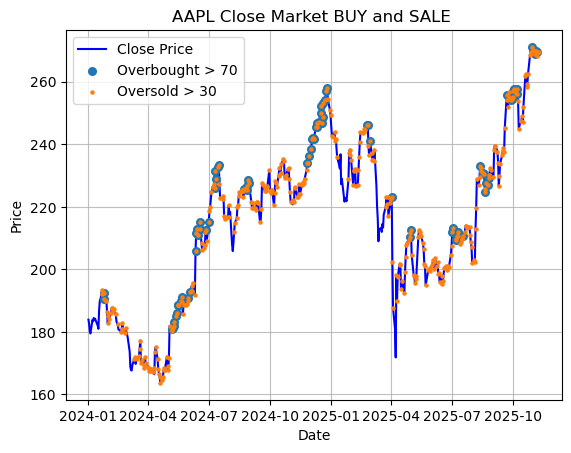

In [70]:

pt.plot(data['Date'],data['Close'], label = 'Close Price', color = 'blue')

# mark
pt.scatter(Overbought['Date'],Overbought['Close'],colorizer = 'red', s =30, label = 'Overbought > 70', zorder = 5)
pt.scatter(Oversold['Date'],Oversold['Close'],colorizer = 'gray', s = 5, label = 'Oversold > 30', zorder = 5)

pt.title('AAPL Close Market BUY and SALE ')
pt.xlabel('Date')
pt.ylabel('Price')
pt.legend()
pt.grid(True, alpha = 0.8)
pt.show()